In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm, t, shapiro
import risk_mgm_lib as rml
import seaborn as sns
import copy

In [79]:
np.random.seed(42)

# Problem 1

In [3]:
data = pd.read_csv('problem1.csv')
data.head()

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284


In [4]:
# Fit a normal and t distribution
mu, std = norm.fit(data)
df, loc, scale = t.fit(data)

In [5]:
n = 10000
normalData = norm.rvs(mu, std, size=n)
tData = t.rvs(df, loc, scale, size=n)

In [6]:
# Calculate VaR
normalVar = rml.calculateVar(normalData)
tVar = rml.calculateVar(tData)
print("Normal distribution VaR: " + str(normalVar))
print("T distribution VaR: " + str(tVar))
print()

# Calculate ES
normalES = rml.calculateES(normalData)
tES = rml.calculateES(tData)
print("Normal distribution ES: " + str(normalES))
print("T distribution ES: " + str(tES))

Normal distribution VaR: 0.08174370098009144
T distribution VaR: 0.07468632530344022

Normal distribution ES: 0.1022921725527085
T distribution ES: 0.11106424051510075


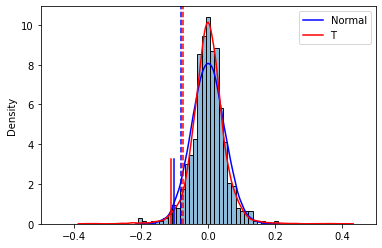

In [7]:
plt.figure()
norm_color = "b"
t_color = "r"

# plot histogram and 2 distributions PDFs
sns.histplot(data, stat="density", color="#cadea5")
sns.kdeplot(normalData, color=norm_color, label='Normal')
sns.kdeplot(tData, color=t_color, label='T')

# overlay the VaR and ES on existing plot
plt.axvline(-normalVar, color=norm_color, linestyle='--')
plt.axvline(-tVar, color=t_color, linestyle='--')
plt.axvline(-normalES, 0, 0.3, color=norm_color)
plt.axvline(-tES, 0, 0.3, color=t_color)

plt.xlim(-0.5, 0.5)
plt.legend()

plt.savefig('ES.png')
plt.show()

# Problem 2

In [80]:
returns = pd.read_csv('DailyReturn.csv', index_col=0)
prices = pd.read_csv('DailyPrices.csv', index_col=0)
portfolio = pd.read_csv('portfolio.csv')

In [9]:
returns.head()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
44606.0,-0.003269,0.001423,-0.000136,0.012222,0.018326,0.009260,0.008723,-0.008426,0.013278,-0.015228,...,-0.013455,-0.008396,-0.005559,0.000520,-0.015466,-0.023272,-0.004768,-0.008806,-0.009122,-0.010335
44607.0,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028571,0.013237
44608.0,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025983
44609.0,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030856,-0.031925,-0.033380,-0.028763
44610.0,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038


In [10]:
#1. Covariance estimation techniques
weights = rml.expWeights(returns.shape[0], 0.94)
print(weights.shape)
cov = rml.expCovMat(returns, weights)
print(cov.shape)

(249,)
(100, 100)


In [120]:
#2. Non PSD fixes for correlation matrices
n = 500
sigma = np.matrix(np.full((n, n), 0.9))
np.fill_diagonal(sigma, 1.0)
sigma[2, 1] = 0.7357
sigma[1, 2] = 0.7357

print(rml.isPSD(rml.nearPSD(sigma)))
print(rml.isPSD(rml.highamPSD(sigma)))

True
True


In [12]:
#3. Simulation Methods
print(rml.multVarNormGen(cov).shape)
print(rml.simulationPCA(cov, 0.75).shape)

(100, 25000)
(100, 25000)


In [13]:
#4. VaR calculation methods (all discussed)
samplePrice = prices.iloc[:,1]
sampleReturn = rml.calculateReturn(samplePrice)
sampleReturn = sampleReturn - np.mean(sampleReturn)

print(rml.calculateVar(sampleReturn))
print(rml.normalVar(sampleReturn))
print(rml.ewcovNormalVar(sampleReturn))
print(rml.tVar(sampleReturn))
print(rml.historicVar(sampleReturn))

0.030447208289108126
0.029607003309013388
0.024076408055577626
0.028356755509246618
0.030447208289108126


In [14]:
#5. ES calculation
print(rml.calculateES(sampleReturn))

0.03977450991511538


# Problem 3
Use your repository from #2.
Using Portfolio.csv and DailyPrices.csv.  Assume the expected return on all stocks is 0.
This file contains the stock holdings of 3 portfolios.  You own each of these portfolios.
Fit a Generalized T model to each stock and calculate the VaR and ES of each portfolio as well as your
total VaR and ES.  Compare the results from this to your VaR form Problem 3 from Week 4.

In [81]:
portfolio.head()

,Portfolio,Stock,Holding
0,A,AAPL,158
1,A,MSFT,178
2,A,AMZN,110
3,A,NVDA,54
4,A,GOOGL,69


In [82]:
# mean 0 of returns
returns = prices.pct_change().dropna(how='all')
returns = returns - np.mean(returns)
returns.head()

,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,META,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-02,-0.010992,-0.014177,-0.017632,-0.002763,-0.025527,-0.018099,-0.025331,-0.017797,-0.017836,-0.033266,...,-0.001401,-0.012419,0.030937,-0.011172,-0.018637,-0.006037,-0.015836,0.002191,-0.013291,-0.024982
2022-09-06,-0.004221,-0.008781,-0.011940,-0.011317,-0.018055,-0.010519,0.015325,-0.011924,-0.004872,-0.013890,...,-0.004862,0.006623,-0.016289,-0.000172,0.002453,-0.009821,-0.001483,-0.012350,-0.003810,0.014647
2022-09-07,0.017517,0.008688,0.018146,0.026385,0.014076,0.023841,0.033561,0.027030,0.015107,0.008882,...,0.016431,0.018469,-0.010200,0.037793,0.019336,0.010477,0.022107,0.008847,0.025901,0.022302
2022-09-08,0.006088,-0.010184,0.000700,0.002288,0.015407,-0.010652,0.019343,-0.010477,0.007202,0.007625,...,0.002228,0.012119,0.027781,0.015137,0.019688,0.014773,-0.012499,0.026460,0.028808,0.009735
2022-09-09,0.015087,0.018274,0.022011,0.026238,0.023659,0.020069,0.035767,0.020686,0.007594,0.040962,...,0.007106,0.015418,0.036603,-0.004923,0.019468,0.024658,0.036130,0.015775,0.004292,0.001067


In [83]:
A = portfolio[portfolio['Portfolio'] == 'A']
B = portfolio[portfolio['Portfolio'] == 'B']
C = portfolio[portfolio['Portfolio'] == 'C']

In [85]:
#calculate PV
def getStockPrice(price, portfolio):
    pv = []
    for stock in portfolio['Stock']:
        pv.append(price.iloc[-1][stock])
    return np.array(pv)

# get stock returns
def getReturn(portfolio):
    ret = []
    for stock in portfolio['Stock'].tolist():
        ret.append((returns[stock]).tolist())
    ret = pd.DataFrame(ret).T
    return ret

In [88]:
# fit generalized T model on each stock and get the porftolio values
def calc_T_portVals(portfolio, ret, price):
    # fit the return data with t distribution and collect the params and CDFs
    cdf = []
    params = []
    for col in ret.columns:
        df, loc, scale = t.fit(ret[col].values)
        params.append([df,loc,scale])
        cdf.append(t.cdf(ret[col].values, df=df, loc=loc, scale=scale).tolist())
    cdf = pd.DataFrame(cdf).T
    
    
    spearmanCorr = cdf.corr(method='spearman')
    sample = pd.DataFrame(rml.simulationPCA(spearmanCorr, 0.95)).T
    sampleCDF = []
    for col in sample.columns:
        sampleCDF.append(norm.cdf(sample[col].values, loc=0, scale=1).tolist())
        
    simReturns = []
    for i in range(len(sampleCDF)):
        simReturns.append(t.ppf(cdf[i], df=params[i][0], loc=params[i][1], scale=params[i][2]))
    simReturns = np.array(simReturns)

    simPrice = (1 + simReturns.T)*price
    portVals = simPrice.dot(portfolio['Holding'])
    portVals.sort()
    
    return portVals

In [89]:
returns_A = getReturn(A)
prices_A = getStockPrice(prices, A)
pv_A = np.sum(A['Holding'] * prices_A)
portValues_A = calc_T_portVals(A, returns_A, prices_A)

print("VaR: ", rml.calculateVar(portValues_A, pv_A))
print("ES: ", rml.calculateES(pv_A - portValues_A))

VaR:  18242.436491595116
ES:  29137.406036398206


In [90]:
returns_B = getReturn(B)
prices_B = getStockPrice(prices, B)
pv_B = np.sum(B['Holding'] * prices_B)
portValues_B = calc_T_portVals(B, returns_B, prices_B)

print("VaR: ", rml.calculateVar(portValues_B, pv_B))
print("ES: ", rml.calculateES(pv_B - portValues_B))

VaR:  11337.063397467136
ES:  15782.464133424477


In [91]:
returns_C = getReturn(C)
prices_C = getStockPrice(prices, C)
pv_C = np.sum(C['Holding'] * prices_C)
portValues_C = calc_T_portVals(C, returns_C, prices_C)

print("VaR: ", rml.calculateVar(portValues_C, pv_C))
print("ES: ", rml.calculateES(pv_C - portValues_C))

VaR:  23752.397536223754
ES:  37556.295508312425


In [92]:
returns_P = getReturn(portfolio)
prices_P = getStockPrice(prices, portfolio)
pv_P = np.sum(portfolio['Holding'] * prices_P)
portValues_P = calc_T_portVals(portfolio, returns_P, prices_P)

print("VaR: ", rml.calculateVar(portValues_P, pv_P))
print("ES: ", rml.calculateES(pv_P - portValues_P))

VaR:  50682.26743179932
ES:  78666.7443152048


In [122]:
norm_test = shapiro(returns)

/Users/fanlingrui/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [132]:
pvalues = []
count = 0
for stock in returns.columns:
    test = shapiro(returns[stock])
    pvalues.append(test.pvalue)
    if test.pvalue < 0.05:
        count += 1

In [133]:
count

96

In [ ]:
len(returns)